### Step 1: Business Problem Understanding
Goal: Classify SMS messages as either spam or ham (normal).

Key Points:
* This code demonstrates how to implement multiple machine learning models (Logistic Regression, SVM, Random Forest, and Naive Bayes) for SMS spam classification.
* It evaluates each model on accuracy, confusion matrix, classification report, and cross-validation scores to help choose the best model.
* The steps are structured similarly to your reference but expanded with additional algorithms.

In [19]:
import numpy as np
import pandas as pd

In [20]:
# load the data set

df = pd.read_csv("SMSSpamCollection",sep="\t",names=["label","message"])


In [21]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 2. Data Understanding

In [22]:
df.shape

(5572, 2)

In [23]:
#    Data Understanding
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [25]:
df["label"].unique()

array(['ham', 'spam'], dtype=object)

In [26]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [27]:
df["label"].value_counts(normalize=True)
#prior probality , ham spam unique values devied by whole values

ham     0.865937
spam    0.134063
Name: label, dtype: float64

### 3. Text Cleaning

In [28]:
#checking if any null value is there

df.isnull().sum()

label      0
message    0
dtype: int64

In [29]:
#checking the duplicates

df.duplicated().sum()

403

In [30]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [31]:
df.duplicated().sum()

0

In [32]:
df.shape

(5169, 2)

### 4. EDA

In [33]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

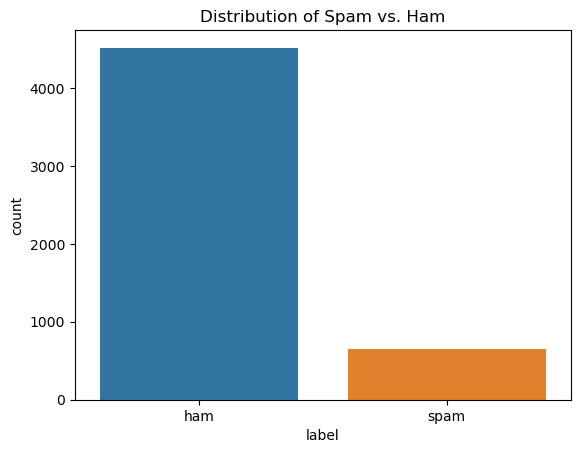

ham     4516
spam     653
Name: label, dtype: int64

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the count of spam vs. ham
sns.countplot(x="label", data=df)
plt.title("Distribution of Spam vs. Ham")
plt.show()

# Displaying the actual numbers
df['label'].value_counts()

### 5. Text Preprocessing

In [41]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download necessary NLTK data
nltk.download('stopwords')

corpus = []
ps = PorterStemmer()

# Use .iloc to iterate over rows
for i in range(len(df)):
    # Remove non-alphabetic characters, keeping spaces
    p = re.sub("[^a-zA-Z]", " ", df["message"].iloc[i])
    
    # Convert to lowercase
    p = p.lower()
    
    # Tokenize the text
    p = p.split()
    
    # Remove stopwords and apply stemming
    p = [ps.stem(word) for word in p if word not in set(stopwords.words("english"))]
    
    # Join the processed words back into a string
    p = " ".join(p)
    
    # Append the processed text to the corpus
    corpus.append(p)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4. Vectorization

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the cleaned text
cv = CountVectorizer(max_features=5000) 
# Limiting features to 5000

X = cv.fit_transform(corpus).toarray()


In [43]:
# Encode target labels
df["label"].replace({"ham": 0, "spam": 1}, inplace=True)
y = df["label"]


In [44]:
X.shape

(5169, 5000)

### 5. Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 6. Modeling with Different Algorithms

1. Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = lr_model.predict(X_test)


2. Support Vector Machine (SVM)

In [48]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear')  # Using linear kernel for text data
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)


3. Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)

4. Naive Bayes (Multinomial)

In [50]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_nb = nb_model.predict(X_test)


### 7. Evaluation of All Models 

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "SVM")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate Naive Bayes
evaluate_model(y_test, y_pred_nb, "Naive Bayes")


Results for Logistic Regression:
Accuracy: 0.9777562862669246
Confusion Matrix:
[[891   3]
 [ 20 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       0.98      0.86      0.91       140

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Results for SVM:
Accuracy: 0.97678916827853
Confusion Matrix:
[[889   5]
 [ 19 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       894
           1       0.96      0.86      0.91       140

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Results for Random Forest:
Accuracy: 0.97678916827853
Confusion Matrix:
[[894   0]
 [ 24 116]]
Classification Re

### 8. Cross Validation for Best Model Selection

In [52]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation for all models
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5).mean()
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5).mean()
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5).mean()
cv_scores_nb = cross_val_score(nb_model, X, y, cv=5).mean()

# Display cross-validation scores
print(f"Cross-validation score (Logistic Regression): {cv_scores_lr}")
print(f"Cross-validation score (SVM): {cv_scores_svm}")
print(f"Cross-validation score (Random Forest): {cv_scores_rf}")
print(f"Cross-validation score (Naive Bayes): {cv_scores_nb}")


Cross-validation score (Logistic Regression): 0.9789130829624331
Cross-validation score (SVM): 0.9791066938046404
Cross-validation score (Random Forest): 0.9742688569283284
Cross-validation score (Naive Bayes): 0.9779454032404539


### 9. Prediction on New Data 

In [58]:
# Example SMS
input_sms = "Congratulations! You've won a $500 gift card to Target. Click here to claim your reward"
dftest = pd.DataFrame({"message": [input_sms]})

# Preprocess the input message
corpus = []
for i in range(len(dftest)):
    p = re.sub("[^a-zA-Z]", " ", dftest["message"][i])
    p = p.lower()
    p = p.split()
    p = [ps.stem(word) for word in p if word not in set(stopwords.words("english"))]
    p = " ".join(p)
    corpus.append(p)

# Vectorize the input
B = cv.transform(corpus).toarray()

# Make prediction using the SVM model
pred = nb_model.predict(B)


# Output the prediction
if pred == 0:
    print("Ham")
else:
    print("Spam")


Spam
